In [31]:
import io
import os
import pickle
import numpy as np
import cv2
from fastapi import FastAPI, File, UploadFile
from PIL import Image
from firebase_admin import credentials, initialize_app
from firebase_admin import storage 

app = FastAPI()

In [15]:
from tensorflow.keras.models import load_model
model = load_model('model.h5', compile=False)

model.weights

[<tf.Variable 'conv1/conv/kernel:0' shape=(7, 7, 3, 64) dtype=float32, numpy=
 array([[[[ 7.82755613e-02,  1.41905621e-02,  2.77232146e-03, ...,
           -7.34727364e-03, -1.54294539e-02, -2.66701411e-02],
          [ 1.64177045e-01, -7.71937100e-03, -4.68205148e-03, ...,
            1.56621709e-02, -1.30844340e-02,  1.28259331e-01],
          [ 4.37899120e-02, -7.88586214e-03, -7.51366140e-03, ...,
           -1.51410159e-02, -1.59265753e-02, -9.03300792e-02]],
 
         [[ 1.49493396e-01,  2.08460707e-02, -8.21969565e-03, ...,
           -3.26420851e-02, -1.16108721e-02, -3.74168977e-02],
          [ 2.48144880e-01,  2.11681356e-03, -9.93694644e-03, ...,
           -3.68802100e-02, -2.01364420e-03,  7.61707202e-02],
          [ 1.12597026e-01,  6.96969219e-03,  1.50776226e-02, ...,
           -1.13535514e-02, -9.01070051e-03, -4.00191024e-02]],
 
         [[ 1.66112572e-01,  2.03311425e-02,  1.05769075e-02, ...,
            3.73937041e-02, -1.37213594e-03, -1.14080589e-02],
      

In [2]:
cred = credentials.Certificate('/Leaf_Fastapi/leaf_app_firebase.json')
firebase_app = initialize_app(cred, {
    'storageBucket': 'leaf-app-8225f.appspot.com'
})

In [34]:
# Define a function to preprocess the input image
def preprocess_image(image):
    # Resize the image to the required size
    # image = image.resize((128, 128))
    img = cv2.resize(image, (128, 128))

    # Convert the image to a numpy array
    img = np.array(img)

    # Normalize the image to have values between 0 and 1
    img = img.astype('float32') / 255.0

    # Add a batch dimension to the image
    # image = np.expand_dims(image, axis=0)

    return img

# @app.post("/detect-image")
# async 
def detect_image(image_path: str):
    # Construct the full path to the image in Firebase Storage
    full_path = f"Images/leaf_imagebibh123.png"

    # Download the image from Firebase Storage
    bucket = storage.bucket()
    blob = bucket.blob(full_path)
    contents = blob.download_as_bytes()

    # Open the image as a PIL Image object
    img = Image.open(io.BytesIO(contents))

    # Preprocess the image for input to the model
    img = preprocess_image(img)

    # Use the pre-trained model to make a prediction on the input image
    prediction = model.predict(img)

    # Convert the prediction to a human-readable label
    label = str(prediction[0])

    return {"label": label}

(1, 128, 128, 3)
1/1 [==============================] - 0s 67ms/step
Blast


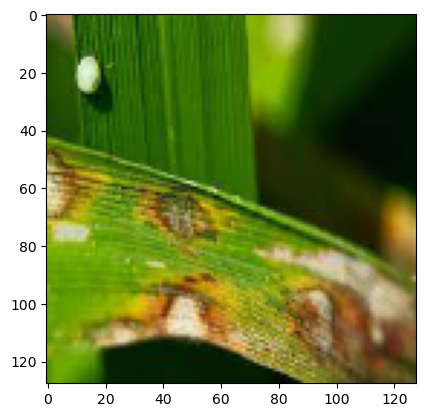

In [58]:
# import datetime
full_path = f"Images/blast.jpg"

import matplotlib.pyplot as plt 
# Download the image from Firebase Storage
bucket = storage.bucket(app=firebase_app)
blob = bucket.blob(full_path)
# print(blob.generate_signed_url(datetime.timedelta(seconds=1000), method='GET'))
contents = blob.download_as_bytes()
# print(contents)

# Open the image as a PIL Image object
img = Image.open(io.BytesIO(contents))
# Preprocess the image for input to the model
img = np.array(img)
img = cv2.resize(img, (128, 128))
img = img.astype('float32')/ 255.0 

plt.imshow(img)
img = np.expand_dims(img, axis=0)
print(img.shape)
# # Use the pre-trained model to make a prediction on the input image
prediction = model.predict(img)
print(leaf_classes[np.argmax(prediction)])

In [21]:
print(detect_image("hello"))

1/1 [==============================] - 0s 71ms/step
{'label': '[0.99978817 0.02202446 0.17528869 0.29277164]'}


In [23]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))

In [24]:
model.weights

[<tf.Variable 'conv1/conv/kernel:0' shape=(7, 7, 3, 64) dtype=float32, numpy=
 array([[[[ 7.82755613e-02,  1.41905621e-02,  2.77232146e-03, ...,
           -7.34727364e-03, -1.54294539e-02, -2.66701411e-02],
          [ 1.64177045e-01, -7.71937100e-03, -4.68205148e-03, ...,
            1.56621709e-02, -1.30844340e-02,  1.28259331e-01],
          [ 4.37899120e-02, -7.88586214e-03, -7.51366140e-03, ...,
           -1.51410159e-02, -1.59265753e-02, -9.03300792e-02]],
 
         [[ 1.49493396e-01,  2.08460707e-02, -8.21969565e-03, ...,
           -3.26420851e-02, -1.16108721e-02, -3.74168977e-02],
          [ 2.48144880e-01,  2.11681356e-03, -9.93694644e-03, ...,
           -3.68802100e-02, -2.01364420e-03,  7.61707202e-02],
          [ 1.12597026e-01,  6.96969219e-03,  1.50776226e-02, ...,
           -1.13535514e-02, -9.01070051e-03, -4.00191024e-02]],
 
         [[ 1.66112572e-01,  2.03311425e-02,  1.05769075e-02, ...,
            3.73937041e-02, -1.37213594e-03, -1.14080589e-02],
      

In [49]:
leaf_classes = np.array(["Brownspot", "Blast", "Brownspot", "Tungro"])

In [53]:
leaf_classes[3]

'Tungro'